In this assignment will be using CIFR10 Dataset.

---


*   The CIFAR-10 dataset contains 60,000 32x32 color images in 10 different classes.

*   The 10 different classes represent airplanes, cars, birds, cats, deer, dogs, frogs, horses, ships, and trucks. There are 6,000 images of each class.




In [1]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Model,Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D, SeparableConv2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras.layers import Input, Concatenate
from keras.layers.merge import concatenate

Using TensorFlow backend.


In [0]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
img_height, img_width, channel = train_features.shape[1],train_features.shape[2],train_features.shape[3]
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

**Sample images from CIFAR-10 dataset**

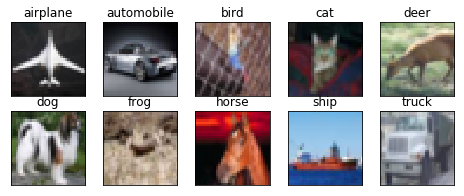

In [3]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

**Utility functions which will help in plotting training and test auuracy vs epochs**

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

**Below code segment is to get the base accuracy which can be used as base line auuracy and later in the assignment will follow the better approaches to improve training accuracy than this base accuracy.**

In [7]:
# Define the model
model = Sequential()
model.add(Convolution2D(48, 3, 3, border_mode='same', input_shape=(32, 32, 3)))
model.add(Activation('relu'))
model.add(Convolution2D(48, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(96, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(96, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(192, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(192, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3))`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3), padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3))`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(192, (3, 3), padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` 

In [8]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 48)        1344      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 48)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 48)        20784     
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 48)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 48)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 48)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 96)        41568     
__________

Instructions for updating:
Use tf.cast instead.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=100)`
  if sys.path[0] == '':


Epoch 1/100
390/390 [==============================] - 14s 35ms/step - loss: 1.8646 - acc: 0.2858 - val_loss: 1.4972 - val_acc: 0.4458
Epoch 2/100
390/390 [==============================] - 9s 23ms/step - loss: 1.3600 - acc: 0.5058 - val_loss: 1.2029 - val_acc: 0.5553
Epoch 3/100
390/390 [==============================] - 9s 22ms/step - loss: 1.1245 - acc: 0.6021 - val_loss: 0.9988 - val_acc: 0.6467
Epoch 4/100
390/390 [==============================] - 9s 22ms/step - loss: 0.9759 - acc: 0.6569 - val_loss: 0.9183 - val_acc: 0.6786
Epoch 5/100
390/390 [==============================] - 9s 22ms/step - loss: 0.8839 - acc: 0.6924 - val_loss: 0.7813 - val_acc: 0.7289
Epoch 6/100
390/390 [==============================] - 9s 22ms/step - loss: 0.8031 - acc: 0.7234 - val_loss: 0.7612 - val_acc: 0.7379
Epoch 7/100
390/390 [==============================] - 9s 22ms/step - loss: 0.7491 - acc: 0.7415 - val_loss: 0.7164 - val_acc: 0.7579
Epoch 8/100
390/390 [==============================] - 9s 22m

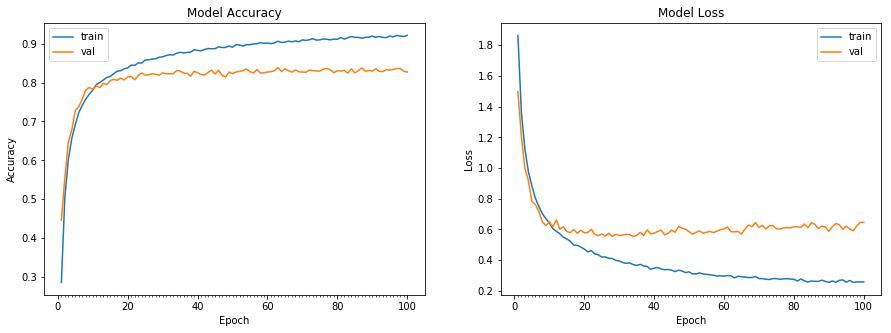

Accuracy on test data is: 82.72


In [9]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 100, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))


From the above base network,  will make few basic changes to improve training accuracy in less number of parameters.

In assignment 6A, following improvements are done.

*   Remove Dense layers
*   Use 1x1 change channel size.
*   Use Batch normalization
*   Add dropouts in right location.
*   Also use Relu after Batch norm.

In this assignment we will add below changes.

*  Normal Convolution
*  Separable Convolution 
*  Depthwise Convolution
*  Grouped Convolution (use 3x3, 5x5 only)
*  Grouped Convolution (use 3x3 only, one with dilation = 1, and another with dilation = 2) 



In [10]:
input = Input(shape=(img_height, img_width, channel,))
num_classes = 10

# Layer 1 - normal convolution
Layer1 = Convolution2D(32, (3,3), strides=(1,1), padding='same', name='conv_1', use_bias=False)(input)
Layer1_normalized = BatchNormalization(name='norm_1')(Layer1)
Layer1_normalized_activated = Activation('relu')(Layer1_normalized)

# Layer 2 - normal convolution
Layer2 = Convolution2D(64, (3,3), strides=(1,1), padding='same', name='conv_2', use_bias=False)(Layer1_normalized_activated)
Layer2_normalized = BatchNormalization(name='norm_2')(Layer2)
Layer2_normalized_activated = Activation('relu')(Layer2_normalized)

# Layer 3 - sptially seperable convolution i.e  (3,1) followed by (1,3) convolutions, this will result in less number of parameters.
Layer31 = Convolution2D(64, (3,1), strides=(1,1), padding='same', name='conv_31', use_bias=False)(Layer2_normalized_activated)
Layer32 = Convolution2D(64, (1,3), strides=(1,1), padding='same', name='conv_32', use_bias=False)(Layer31)
Layer3_normalized = BatchNormalization(name='norm_3')(Layer32)
Layer3_normalized_activated = Activation('relu')(Layer3_normalized)

Layer3_normalized_activated = Dropout(0.25)(Layer3_normalized_activated)

Layer_trans11 = Convolution2D(32, 1, 1, activation='relu')(Layer3_normalized_activated)
Layer_trans12 = MaxPooling2D(pool_size=(2, 2))(Layer_trans11) #16


# Layer 4 - Depthwise seperable convolution
Layer4 = SeparableConv2D(128, (3,3), strides=(1,1), padding='same', name='conv_4', use_bias=False)(Layer_trans12)
Layer4_normalized = BatchNormalization(name='norm_4')(Layer4)
Layer4_normalized_activated = Activation('relu')(Layer4_normalized)

Layer41 = SeparableConv2D(256, (3,3), strides=(1,1), padding='same', name='conv_41', use_bias=False)(Layer4_normalized_activated)
Layer41_normalized = BatchNormalization(name='norm_41')(Layer41)
Layer41_normalized_activated = Activation('relu')(Layer41_normalized)

Layer42 = SeparableConv2D(256, (3,3), strides=(1,1), padding='same', name='conv_41', use_bias=False)(Layer4_normalized_activated)
Layer42_normalized = BatchNormalization(name='norm_42')(Layer42)
Layer42_normalized_activated = Activation('relu')(Layer42_normalized)

Layer42_normalized_activated = Dropout(0.25)(Layer42_normalized_activated)

Layer_trans21 = Convolution2D(32, 1, 1, activation='relu')(Layer42_normalized_activated)
Layer_trans22 = MaxPooling2D(pool_size=(2, 2))(Layer_trans21) #8

# Layer 5 - Depthwise seperable convolution
Layer5 = SeparableConv2D(256, (3,3), strides=(1,1), padding='same', name='conv_5', use_bias=False)(Layer_trans22)
Layer5_normalized = BatchNormalization(name='norm_5')(Layer5)
Layer5_normalized_activated = Activation('relu')(Layer5_normalized)

# Layer 6 - Group convolution, 3x3
Layer6 = Convolution2D(512, (3,3), strides=(1,1), padding='same', name='conv_6', use_bias=False)(Layer5_normalized_activated)
Layer6_normalized = BatchNormalization(name='norm_6')(Layer6)
Layer6_normalized_activated = Activation('relu')(Layer6_normalized)

# Layer 7 - Group convolution, 5x5
Layer7 = Convolution2D(512, (3,3), strides=(1,1), padding='same', name='conv_7', use_bias=False)(Layer6_normalized_activated)
Layer7_normalized = BatchNormalization(name='norm_7')(Layer7)
Layer7_normalized_activated = Activation('relu')(Layer7_normalized)

Layer_concatenated_6_7 = concatenate([Layer6_normalized_activated, Layer7_normalized_activated])

Layer_concatenated_6_7 = Dropout(0.25)(Layer_concatenated_6_7)

Layer_trans21 = Convolution2D(10, 1, 1, activation='relu')(Layer_concatenated_6_7)
Layer_trans22 = MaxPooling2D(pool_size=(2, 2))(Layer_trans21) #4


# Layer 8 - Group convolution, 3x3, with dilation = 1
Layer8 = Convolution2D(128, (3,3), strides=(1,1), padding='same', name='conv_8', use_bias=False)(Layer_trans22)
Layer8_normalized = BatchNormalization(name='norm_8')(Layer8)
Layer8_normalized_activated = Activation('relu')(Layer8_normalized)

# Layer 9 - Group convolution, 3x3, with dilation = 2
Layer9 = Convolution2D(128, (3,3), strides=(1,1), padding='same', dilation_rate=(2, 2), name='conv_9', use_bias=False)(Layer8_normalized_activated)
Layer9_normalized = BatchNormalization(name='norm_9')(Layer9)
Layer9_normalized_activated = Activation('relu')(Layer8_normalized)

Layer_concatenated_8_9 = concatenate([Layer8_normalized_activated, Layer9_normalized_activated])

Layer_tranfrom = Convolution2D(10, 1, 1, activation='relu')(Layer_concatenated_8_9)
Layer_final = Convolution2D(10, (4,4), strides=(1,1), name='conv_10', use_bias=False)(Layer_tranfrom)

Flattened_layers = Flatten()(Layer_final)

output = Dense(num_classes, activation='softmax')(Flattened_layers)
model = Model(inputs=[input], outputs=[output])

model.summary()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (1, 1), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:41: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (1, 1), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:63: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:79: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), activation="relu")`


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
conv_1 (Conv2D)                 (None, 32, 32, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
norm_1 (BatchNormalization)     (None, 32, 32, 32)   128         conv_1[0][0]                     
__________________________________________________________________________________________________
activation_9 (Activation)       (None, 32, 32, 32)   0           norm_1[0][0]                     
__________________________________________________________________________________________________
conv_2 (Co

**Below we can see training auuracy improved by 4% by using the above mentioned improvements.**

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=97, epochs=50)`
  if sys.path[0] == '':


Epoch 1/50
97/97 [==============================] - 37s 382ms/step - loss: 1.6164 - acc: 0.4017 - val_loss: 1.7497 - val_acc: 0.3838
Epoch 2/50
97/97 [==============================] - 32s 334ms/step - loss: 1.1862 - acc: 0.5677 - val_loss: 1.4030 - val_acc: 0.5136
Epoch 3/50
97/97 [==============================] - 28s 293ms/step - loss: 0.9816 - acc: 0.6501 - val_loss: 1.9732 - val_acc: 0.4372
Epoch 4/50
97/97 [==============================] - 29s 295ms/step - loss: 0.8346 - acc: 0.7023 - val_loss: 1.2780 - val_acc: 0.6009
Epoch 5/50
97/97 [==============================] - 29s 296ms/step - loss: 0.7334 - acc: 0.7399 - val_loss: 0.9585 - val_acc: 0.6743
Epoch 6/50
97/97 [==============================] - 29s 296ms/step - loss: 0.6593 - acc: 0.7665 - val_loss: 0.8345 - val_acc: 0.7122
Epoch 7/50
97/97 [==============================] - 29s 295ms/step - loss: 0.5898 - acc: 0.7917 - val_loss: 0.7537 - val_acc: 0.7431
Epoch 8/50
97/97 [==============================] - 29s 295ms/step - 

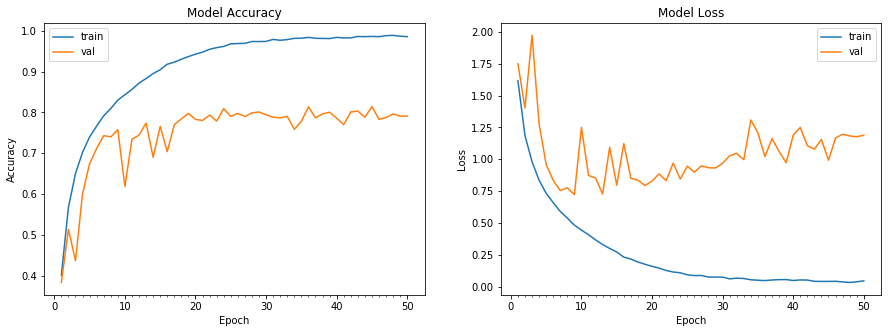

Accuracy on test data is: 79.11


In [11]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 512),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))